In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import napari

In [ ]:
import torch

In [ ]:
print(torch.__version__)

2.0.1


In [ ]:
torch.cuda.is_available()

False

Разделим массивы на трэйн, валидацию и тест. Также разделим их на блоки. Вначале каждый массив должен быть отрегулирован (data>0).
В массив train будут входить: Mike2, Mike5, Kurakina. В массив validation: Sergeeva, Khilov. В test: Nika, finger0.

In [ ]:
def read_data_and_levels(folder):
    data = np.load(folder + '/data.npy')
    data[data < 0] = 0
    levels = np.load(folder + '/levels.npy')
    return data , levels

In [ ]:
def create_mask(upper_layer, second_layer):
    mask = np.zeros((256, 512, 512), dtype=int)
    for x in range(512):
        for y in range(512):
            z1 = upper_layer[x, y]
            z2 = second_layer[x, y]
            mask[int(z1):int(z2), y, x] = 1
    return mask

In [ ]:
def cutted_array(data, masks, start, end):
    return data[:, :, start:end], masks[:, :, :, start:end]

In [ ]:
def from_levels_to_masks(levels):
    masks = np.zeros((5, 256, 512, 512), dtype=int)
    zero_level = np.zeros((512, 512))
    last_level = np.ones((512, 512)) * 255
    masks[0] = create_mask(zero_level, levels[0])
    masks[1] = create_mask(levels[0], levels[1])
    masks[2] = create_mask(levels[1], levels[2])
    masks[3] = create_mask(levels[2], levels[3])
    masks[4] = create_mask(levels[3], last_level)
    return masks

In [ ]:
piece_size = 64

In [ ]:
def make_new_blocks(data, masks):
    blocks = torch.empty(32, 256, piece_size, piece_size)
    ind = 0
    blocks_masks = torch.empty(32, 5, 256, piece_size, piece_size)
    for y in tqdm(range(0, 512, piece_size)):
      for x in range(0, 256, piece_size):
        blocks[ind] = torch.tensor(data[:, y : y + piece_size, x : x + piece_size])
        blocks_masks[ind] = torch.tensor((masks[:, :,  y : y + piece_size, x : x + piece_size]))
        ind += 1
    return blocks, blocks_masks

In [ ]:
def viewer_data(data, masks):
    viewer = napari.view_image(data, name='3D Image', colormap='afmhot', contrast_limits = (15,  41))

    colors = np.linspace(
        start=[1, 1, 1, 1],
        stop=[0, 1, 0, 1],
        num=10,
        endpoint=True
    )
    colors[0] = np.array([1., 1., 1., 0])
    new_colormap = {
      'colors': colors,
      'name': 'white_to_green',
      'interpolation': 'linear'
    }

    for i in range(5):
        viewer.add_image(masks[i], name='Segmentation Mask', colormap=new_colormap, opacity=0.3)
    napari.run()

In [ ]:
def just_show(picture):
    # plt.figure(figsize=(10, 5))
    plt.imshow(picture, cmap = 'afmhot')
    plt.show()

In [ ]:
def plot_block_with_mask(blocks, blocks_masks, num = 30, y = 30):
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(blocks[num][:,  y])
    f.add_subplot(1,2, 2)
    plt.imshow(blocks_masks[num][2, :, y])
    plt.show(block=True)

start и end были предварительно выбраны при отсмотре изображений с разметкой

In [ ]:
#Добавленно

# Finger5

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/nikafinger')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 156, 156+256)

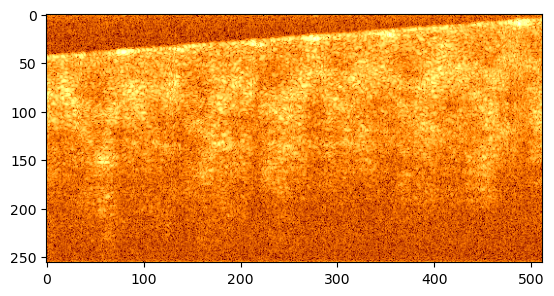

In [ ]:
just_show(data[:,:,10])

In [ ]:
viewer_data(data, masks)

In [ ]:
blocks, blocks_masks = make_new_blocks(data, masks)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 13.77it/s]


In [ ]:
blocks.size()

torch.Size([32, 256, 64, 64])

In [ ]:
blocks_masks.size()

torch.Size([32, 5, 256, 64, 64])

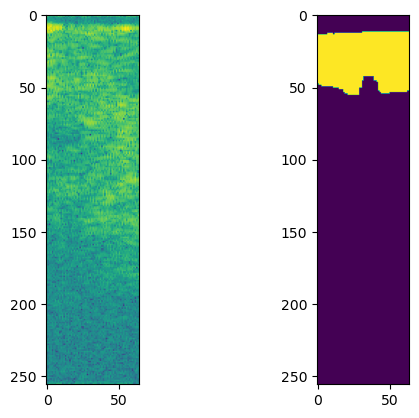

In [ ]:
plot_block_with_mask(blocks, blocks_masks, num = 28)

In [ ]:
torch.save(blocks_masks, "C:/Users/MK/Nika/Data64/test/finger5_blocks.pt")
torch.save(blocks, 'C:/Users/MK/Nika/Data64/test/finger5.pt')

## finger6 (finger0)

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/finger0')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 60, 60+256)

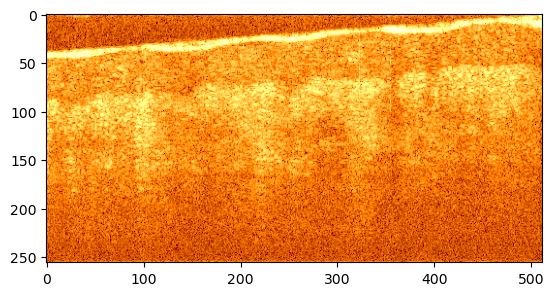

In [ ]:
just_show(data[:,:,10])

In [ ]:
blocks, blocks_masks = make_new_blocks(data, masks)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.13it/s]


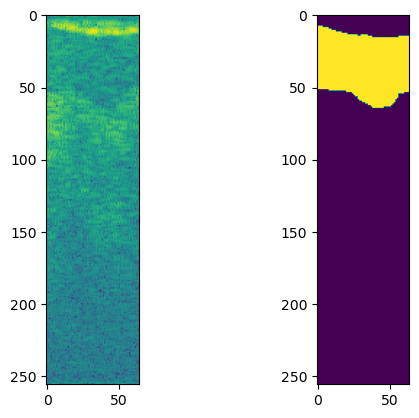

In [ ]:
plot_block_with_mask(blocks, blocks_masks, num = 28)

In [ ]:
torch.save(blocks_masks, "C:/Users/MK/Nika/Data64/test/finger6_blocks.pt")
torch.save(blocks, 'C:/Users/MK/Nika/Data64/test/finger6.pt')

# Finger0

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/khilovfinger')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 41, 41+256)

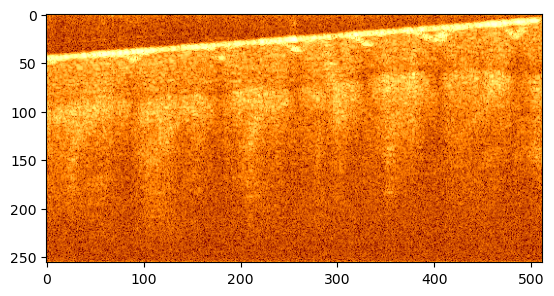

In [ ]:
just_show(data[:,:,10])

In [ ]:
viewer_data(data, masks)

In [ ]:
blocks, blocks_masks = make_new_blocks(data, masks)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 20.21it/s]


In [ ]:
blocks.size()

torch.Size([32, 256, 64, 64])

In [ ]:
blocks_masks.size()

torch.Size([32, 5, 256, 64, 64])

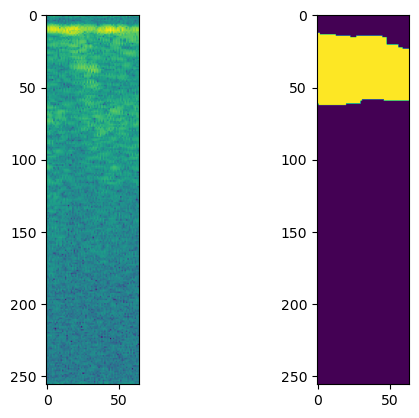

In [ ]:
plot_block_with_mask(blocks, blocks_masks)

In [ ]:
torch.save(blocks_masks, "C:/Users/MK/Nika/Data64/finger0_blocks.pt")
torch.save(blocks, 'C:/Users/MK/Nika/Data64/finger0.pt')

# Finger1

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/finger2')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 78, 78+256)

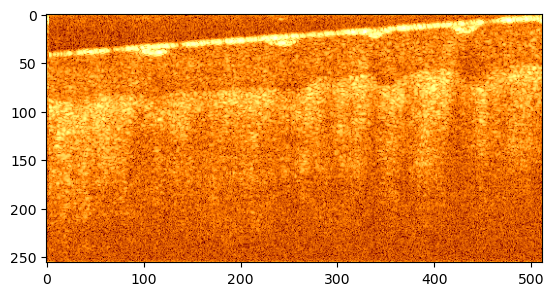

In [ ]:
just_show(data[:,:,10])

In [ ]:
viewer_data(data, masks)

In [ ]:
blocks, blocks_masks = make_new_blocks(data, masks)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 20.87it/s]


In [ ]:
blocks.size()

torch.Size([32, 256, 64, 64])

In [ ]:
blocks_masks.size()

torch.Size([32, 5, 256, 64, 64])

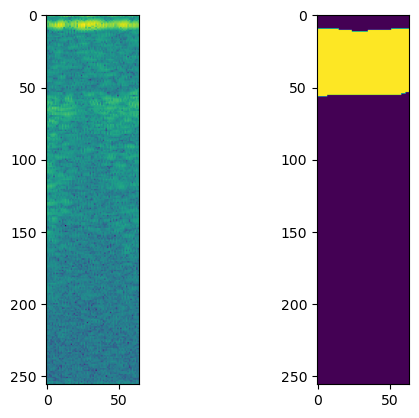

In [ ]:
plot_block_with_mask(blocks, blocks_masks, num = 28)

In [ ]:
torch.save(blocks_masks, "C:/Users/MK/Nika/Data64/finger1_blocks.pt")
torch.save(blocks, 'C:/Users/MK/Nika/Data64/finger1.pt')

# Finger2

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/finger3')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 84, 84+256)

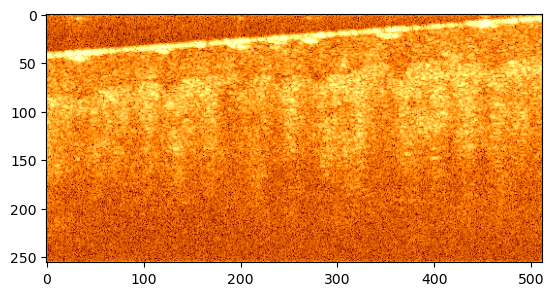

In [ ]:
just_show(data[:,:,10])

In [ ]:
viewer_data(data, masks)

In [ ]:
blocks, blocks_masks = make_new_blocks(data, masks)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 21.22it/s]


In [ ]:
blocks.size()

torch.Size([32, 256, 64, 64])

In [ ]:
blocks_masks.size()

torch.Size([32, 5, 256, 64, 64])

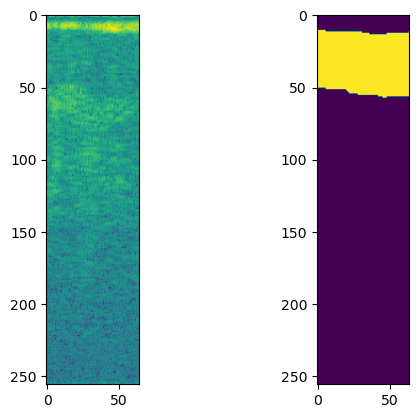

In [ ]:
plot_block_with_mask(blocks, blocks_masks, num = 28)

In [ ]:
torch.save(blocks_masks, "C:/Users/MK/Nika/Data64/finger2_blocks.pt")
torch.save(blocks, 'C:/Users/MK/Nika/Data64/finger2.pt')

# Finger3

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/sergeevafinger')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 161, 161+256)

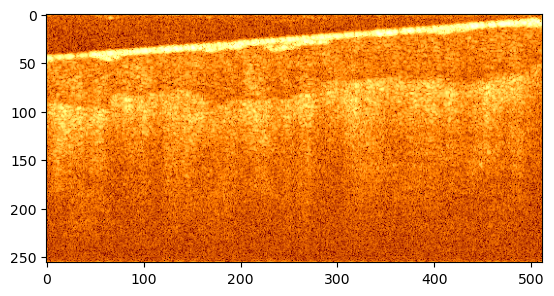

In [ ]:
just_show(data[:,:,10])

In [ ]:
viewer_data(data, masks)

In [ ]:
blocks, blocks_masks = make_new_blocks(data, masks)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.48it/s]


In [ ]:
blocks.size()

torch.Size([32, 256, 64, 64])

In [ ]:
blocks_masks.size()

torch.Size([32, 5, 256, 64, 64])

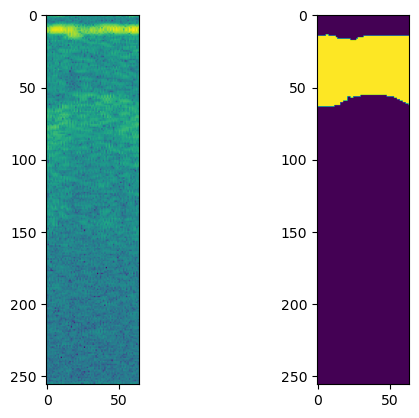

In [ ]:
plot_block_with_mask(blocks, blocks_masks, num = 28)

In [ ]:
torch.save(blocks_masks, "C:/Users/MK/Nika/Data64/finger3_blocks.pt")
torch.save(blocks, 'C:/Users/MK/Nika/Data64/finger3.pt')

# Finger4

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/kurakinafinger')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 0, 0+256)

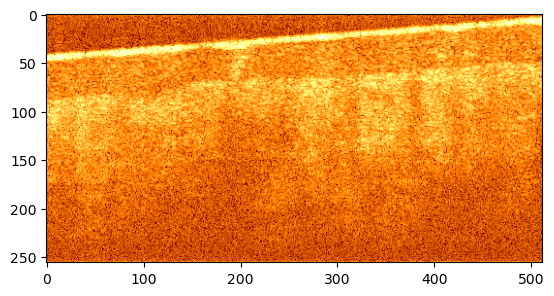

In [ ]:
just_show(data[:,:,10])

In [ ]:
viewer_data(data, masks)

In [ ]:
blocks, blocks_masks = make_new_blocks(data, masks)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 20.91it/s]


In [ ]:
blocks.size()

torch.Size([32, 256, 64, 64])

In [ ]:
blocks_masks.size()

torch.Size([32, 5, 256, 64, 64])

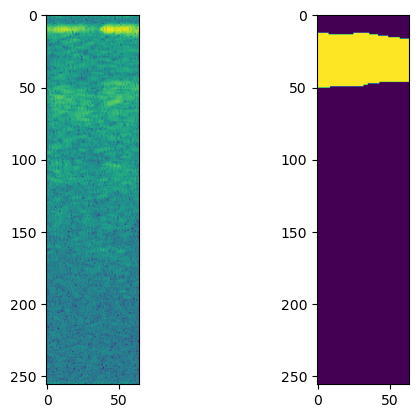

In [ ]:
plot_block_with_mask(blocks, blocks_masks, num = 30)

In [ ]:
torch.save(blocks_masks, "C:/Users/MK/Nika/Data64/finger4_blocks.pt")
torch.save(blocks, 'C:/Users/MK/Nika/Data64/finger4.pt')

# Для теста остаются два

Nika finger

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/nikafinger')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 156, 456)

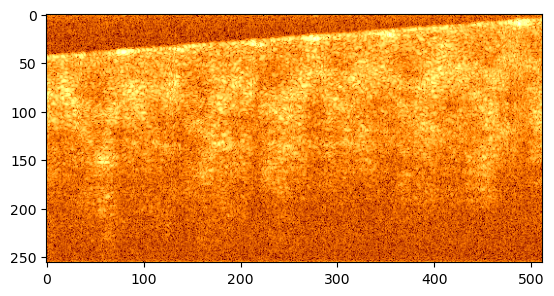

In [ ]:
just_show(data[:,:,10])

In [ ]:
viewer_data(data, masks)

finger0

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/finger0')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 60, 484)

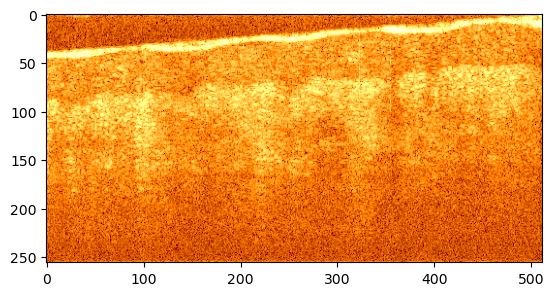

In [ ]:
just_show(data[:,:,10])

In [ ]:
viewer_data(data, masks)

# Разбиение на новые блоки со сдвигом

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import napari

Разделим массивы на трэйн, валидацию и тест. Также разделим их на блоки. Вначале каждый массив должен быть отрегулирован (data>0).
В массив train будут входить: Mike2, Mike5, Kurakina. В массив validation: Sergeeva, Khilov. В test: Nika, finger0.

In [ ]:
def read_data(folder):
    data = np.load(folder + '/data.npy')
    data[data < 0] = 0
    return data

In [ ]:
def cutted_array(data, start, end):
    return data[:, :, start:end]

In [ ]:
piece_size = 64

In [ ]:
def make_new_blocks1(data):
    blocks = torch.empty(21, 256, piece_size, piece_size)
    ind = 0
    for y in tqdm(range(0, 448, piece_size)):
      for x in range(0, 192, piece_size):
        blocks[ind] = torch.tensor(data[:, y : y + piece_size, x : x + piece_size])
        ind += 1
    return blocks

In [ ]:
def just_show(picture):
    # plt.figure(figsize=(10, 5))
    plt.imshow(picture, cmap = 'afmhot')
    plt.show()

# Finger0

In [ ]:
data = read_data('F:/Кожа/размеченные датасеты/khilovfinger')
data = cutted_array(data, 41 + 32, 41+256-32)

In [ ]:
np.save('C:/Users/MK/Nika/Data64/finger0_data.npy', data)

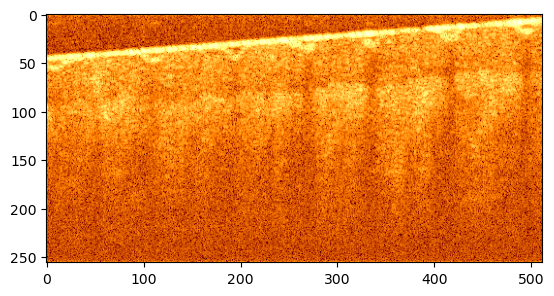

In [ ]:
just_show(data[:,:,10])

In [ ]:
blocks = make_new_blocks1(data)

100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 103.98it/s]


In [ ]:
blocks.size()

torch.Size([21, 256, 64, 64])

In [ ]:
torch.save(blocks, 'C:/Users/MK/Nika/Data64/finger0_2.pt')

# Finger 1

In [ ]:
data = read_data('F:/Кожа/размеченные датасеты/finger2')
data = cutted_array(data, 78 + 32, 78+256-32)

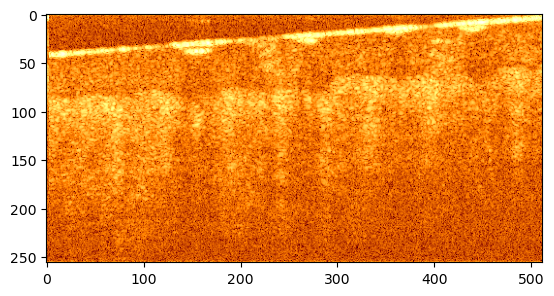

In [ ]:
just_show(data[:,:,10])

In [ ]:
blocks = make_new_blocks1(data)

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 73.33it/s]


In [ ]:
blocks.size()
torch.save(blocks, 'C:/Users/MK/Nika/Data64/finger1_2.pt')

# Finger 2

In [ ]:
data = read_data('F:/Кожа/размеченные датасеты/finger3')
data = cutted_array(data, 84 + 32, 84+256-32)

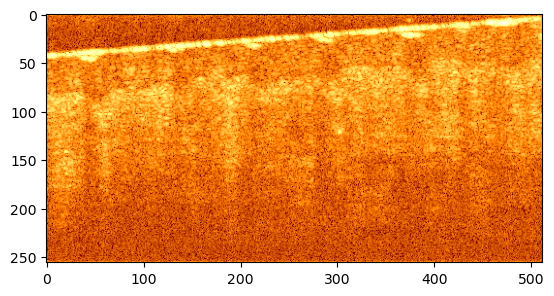

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 72.62it/s]


In [ ]:
just_show(data[:,:,10])
blocks = make_new_blocks1(data)
blocks.size()
torch.save(blocks, 'C:/Users/MK/Nika/Data64/finger2_2.pt')

In [ ]:
blocks.size()

torch.Size([21, 256, 64, 64])

# Finger 3

In [ ]:
data = read_data('F:/Кожа/размеченные датасеты/sergeevafinger')
data = cutted_array(data, 161+32, 161+256-32)

In [ ]:
np.save('C:/Users/MK/Nika/Data64/finger3_data.npy', data)

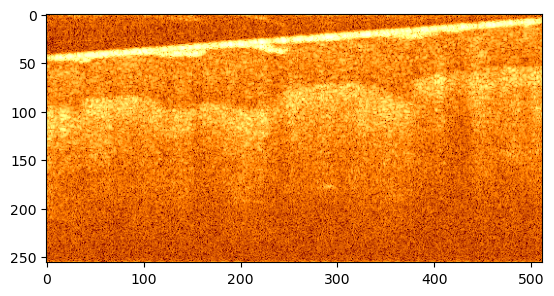

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 65.60it/s]


torch.Size([21, 256, 64, 64])

In [ ]:
just_show(data[:,:,10])
blocks = make_new_blocks1(data)
torch.save(blocks, 'C:/Users/MK/Nika/Data64/finger3_2.pt')
blocks.size()

# Finger 4

In [ ]:
data = read_data('F:/Кожа/размеченные датасеты/kurakinafinger')
data = cutted_array(data, 0+32, 0+256-32)

In [ ]:
np.save('C:/Users/MK/Nika/Data64/finger4_data.npy', data)

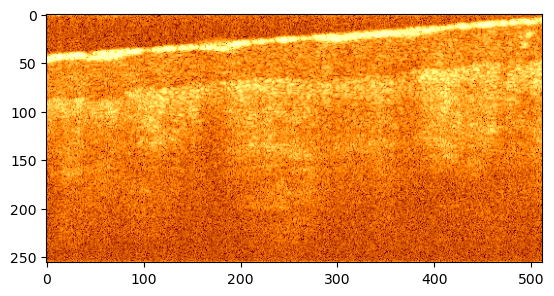

100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 117.82it/s]


torch.Size([21, 256, 64, 64])

In [ ]:
just_show(data[:,:,10])
blocks = make_new_blocks1(data)
torch.save(blocks, 'C:/Users/MK/Nika/Data64/finger4_2.pt')
blocks.size()

# Сохранение самих массивов для визуализации

In [ ]:
data = read_data('F:/Кожа/размеченные датасеты/khilovfinger')
data = cutted_array(data, 41, 41+256)
np.save('C:/Users/MK/Nika/Data64/finger0_data.npy', data)

In [ ]:
data = read_data('F:/Кожа/размеченные датасеты/finger2')
data = cutted_array(data, 78, 78+256)
np.save('C:/Users/MK/Nika/Data64/finger1_data.npy', data)

In [ ]:
data = read_data('F:/Кожа/размеченные датасеты/finger3')
data = cutted_array(data, 84, 84+256)
np.save('C:/Users/MK/Nika/Data64/finger2_data.npy', data)

In [ ]:
data = read_data('F:/Кожа/размеченные датасеты/sergeevafinger')
data = cutted_array(data, 161, 161+256)
np.save('C:/Users/MK/Nika/Data64/finger3_data.npy', data)

In [ ]:
data = read_data('F:/Кожа/размеченные датасеты/kurakinafinger')
data = cutted_array(data, 0, 0+256)
np.save('C:/Users/MK/Nika/Data64/finger4_data.npy', data)

# Сохранение тестовых массивов с разбиением на блоки

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import napari

Разделим массивы на трэйн, валидацию и тест. Также разделим их на блоки. Вначале каждый массив должен быть отрегулирован (data>0).
В массив train будут входить: Mike2, Mike5, Kurakina. В массив validation: Sergeeva, Khilov. В test: Nika, finger0.

In [ ]:
def read_data(folder):
    data = np.load(folder + '/data.npy')
    data[data < 0] = 0
    return data

In [ ]:
def cutted_array(data, start, end):
    return data[:, :, start:end]

In [ ]:
piece_size = 64

In [ ]:
def make_new_blocks1(data):
    blocks = torch.empty(21, 256, piece_size, piece_size)
    ind = 0
    for y in tqdm(range(0, 448, piece_size)):
      for x in range(0, 192, piece_size):
        blocks[ind] = torch.tensor(data[:, y : y + piece_size, x : x + piece_size])
        ind += 1
    return blocks

In [ ]:
def just_show(picture):
    # plt.figure(figsize=(10, 5))
    plt.imshow(picture, cmap = 'afmhot')
    plt.show()

In [ ]:
def make_new_blocks2(data):
    blocks = torch.empty(32, 256, piece_size, piece_size)
    ind = 0
    for y in tqdm(range(0, 512, piece_size)):
      for x in range(0, 256, piece_size):
        blocks[ind] = torch.tensor(data[:, y : y + piece_size, x : x + piece_size])
        ind += 1
    return blocks

## nikafinger (finger 5)

In [ ]:
data = read_data('F:/Кожа/размеченные датасеты/nikafinger')
data = cutted_array(data, 156, 412)
np.save('C:/Users/MK/Nika/Data64/test/finger5_data.npy', data)

In [ ]:
blocks = make_new_blocks2(data)
torch.save(blocks, 'C:/Users/MK/Nika/Data64/test/finger5.pt')

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 39.09it/s]


In [ ]:
data = read_data('F:/Кожа/размеченные датасеты/nikafinger')
data = cutted_array(data, 156 + 32, 412 - 32)
blocks = make_new_blocks1(data)
torch.save(blocks, 'C:/Users/MK/Nika/Data64/test/finger5_2.pt')
blocks.size()

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 70.40it/s]


torch.Size([21, 256, 64, 64])

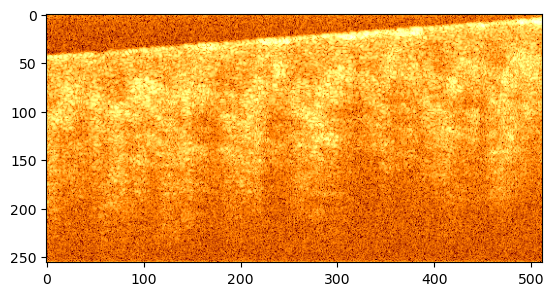

In [ ]:
just_show(data[:,:,10])

## finger0

In [ ]:
data = read_data('F:/Кожа/размеченные датасеты/finger0')
data = cutted_array(data, 60, 316)
np.save('C:/Users/MK/Nika/Data64/test/finger6_data.npy', data)

In [ ]:
blocks = make_new_blocks2(data)
torch.save(blocks, 'C:/Users/MK/Nika/Data64/test/finger6.pt')

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 50.23it/s]


In [ ]:
data = read_data('F:/Кожа/размеченные датасеты/nikafinger')
data = cutted_array(data, 60 + 32, 316 - 32)
blocks = make_new_blocks1(data)
torch.save(blocks, 'C:/Users/MK/Nika/Data64/test/finger6_2.pt')
blocks.size()

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 83.08it/s]


torch.Size([21, 256, 64, 64])

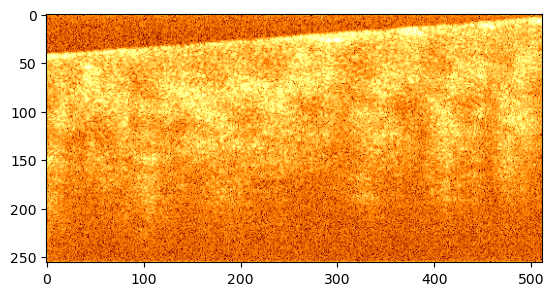

In [ ]:
just_show(data[:,:,10])

# Проверка новой модели на валидации

In [ ]:
def DICE_COE(mask1, mask2):
    intersect = np.sum(mask1*mask2)
    fsum = np.sum(mask1)
    ssum = np.sum(mask2)
    dice = (2 * intersect ) / (fsum + ssum)
    # dice = round(dice, 3) # for easy reading
    return dice

## 1 параметры

### 1 кросс валидация

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/khilovfinger')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 41, 41+256)

masks_model = np.load('C:/Users/MK/Nika/exp5/hyperparameter0/val/masks_model0.npy')

viewer_data(data, masks)

In [ ]:
viewer_data(data, masks_model)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

In [ ]:
dice

array([0.69653164, 0.54063142, 0.46547852, 0.63249201, 0.93890071])

In [ ]:
np.mean(dice)

0.654806859752336

### 2 кросс валидация

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/finger2')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 78, 78+256)

masks_model = np.load('C:/Users/MK/Nika/exp5/hyperparameter0/val/masks_model1.npy')

# viewer_data(data, masks)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

print(dice)

[0.77820878 0.84989421 0.86303692 0.79608575 0.94082908]


In [ ]:
np.mean(dice)

0.8456109480332206

In [ ]:
viewer_data(data, masks_model)

### 3 кросс валидация

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/finger3')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 84, 84+256)

masks_model = np.load('C:/Users/MK/Nika/exp5/hyperparameter0/val/masks_model2.npy')

viewer_data(data, masks)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

print(dice)

[0.97621939 0.37337197 0.75458549 0.36128418 0.84344395]


In [ ]:
np.mean(dice)

0.6617809963424399

In [ ]:
viewer_data(data, masks_model)

### 4 кросс валидация

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/sergeevafinger')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 161, 161+256)

masks_model = np.load('C:/Users/MK/Nika/exp5/hyperparameter0/val/masks_model3.npy')

viewer_data(data, masks)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

print(dice)

[0.78736235 0.31092459 0.76612622 0.12891597 0.87021926]


In [ ]:
np.mean(dice)

0.5727096769877866

In [ ]:
viewer_data(data, masks_model)

### 5 кросс валидация

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/kurakinafinger')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 0, 0+256)

masks_model = np.load('C:/Users/MK/Nika/exp5/hyperparameter0/val/masks_model4.npy')

viewer_data(data, masks)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

print(dice)

[0.98116468 0.39842121 0.81067111 0.19120099 0.80234026]


In [ ]:
np.mean(dice)

0.6367596503630331

In [ ]:
viewer_data(data, masks_model)

# 2 параметры

### 1 кросс валидация

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/khilovfinger')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 41, 41+256)

masks_model = np.load('C:/Users/MK/Nika/exp5/hyperparameter1/val/masks_model0.npy')

In [ ]:
viewer_data(data, masks_model)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

In [ ]:
dice

array([0.88386388, 0.78183377, 0.58574837, 0.58242191, 0.94338104])

In [ ]:
np.mean(dice)

0.755449795046099

### 2 кросс валидация

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/finger2')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 78, 78+256)

masks_model = np.load('C:/Users/MK/Nika/exp5/hyperparameter1/val/masks_model1.npy')

viewer_data(data, masks)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

print(dice)

[0.94164963 0.51918716 0.84182354 0.53374672 0.86591804]


In [ ]:
np.mean(dice)

0.7404650196889355

In [ ]:
viewer_data(data, masks_model)

### 3 кросс валидация

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/finger3')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 84, 84+256)

masks_model = np.load('C:/Users/MK/Nika/exp5/hyperparameter1/val/masks_model2.npy')

viewer_data(data, masks)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

print(dice)

[0.90464986 0.73525551 0.83069687 0.56325803 0.9244848 ]


In [ ]:
np.mean(dice)

0.791669013831318

In [ ]:
viewer_data(data, masks_model)

### 4 кросс валидация

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/sergeevafinger')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 161, 161+256)

masks_model = np.load('C:/Users/MK/Nika/exp5/hyperparameter1/val/masks_model3.npy')

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

print(dice)

[0.70613413 0.30388042 0.64603363 0.01529792 0.82755072]


In [ ]:
np.mean(dice)

0.49977936279474183

In [ ]:
viewer_data(data, masks_model)

### 5 кросс валидация

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/kurakinafinger')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 0, 0+256)

masks_model = np.load('C:/Users/MK/Nika/exp5/hyperparameter1/val/masks_model4.npy')

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

print(dice)

[0.75288716 0.45534543 0.7544851  0.28783615 0.79411044]


In [ ]:
np.mean(dice)

0.6089328550847244

In [ ]:
viewer_data(data, masks_model)

In [ ]:
viewer_data(data, masks)

# Сравнение двух этих моделей через dice коэффициент

In [ ]:
dices1 =[[0.69653164, 0.54063142, 0.46547852, 0.63249201, 0.93890071],
[0.77820878, 0.8498942, 0.86303692, 0.79608575, 0.94082908],
[0.97621939, 0.37337197, 0.75458549, 0.36128418, 0.84344395],
[0.78736235, 0.31092459, 0.76612622, 0.12891597, 0.87021926],
[0.78736235, 0.31092459, 0.76612622, 0.12891597, 0.87021926]]

In [ ]:
dices1 = np.array(dices1)

In [ ]:
dices1.mean()

0.6615236315999999

In [ ]:
str = '[[0.88386388, 0.78183377, 0.58574837, 0.58242191, 0.94338104],[0.94164963 0.51918716 0.84182354 0.53374672 0.86591804],[0.90464986 0.73525551 0.83069687 0.56325803 0.9244848 ],[0.70613413 0.30388042 0.64603363 0.01529792 0.82755072],[0.75288716 0.45534543 0.7544851  0.28783615 0.79411044]]'
str = str.replace(' ', ',')

In [ ]:
str

'[[0.88386388,,0.78183377,,0.58574837,,0.58242191,,0.94338104],[0.94164963,0.51918716,0.84182354,0.53374672,0.86591804],[0.90464986,0.73525551,0.83069687,0.56325803,0.9244848,],[0.70613413,0.30388042,0.64603363,0.01529792,0.82755072],[0.75288716,0.45534543,0.7544851,,0.28783615,0.79411044]]'

In [ ]:
dices2 = [[0.88386388,0.78183377,0.58574837,0.58242191,0.94338104],
          [0.94164963,0.51918716,0.84182354,0.53374672,0.86591804],
          [0.90464986,0.73525551,0.83069687,0.56325803,0.9244848,],
          [0.70613413,0.30388042,0.64603363,0.01529792,0.82755072],
          [0.75288716,0.45534543,0.7544851,0.28783615,0.79411044]]

In [ ]:
dices2 = np.array(dices2)

In [ ]:
dices2.mean()

0.6792592091999999

In [ ]:
np.mean(dices1, axis=0)

array([0.8051369 , 0.47714935, 0.72307067, 0.40953878, 0.89272245])

In [ ]:
np.mean(dices2, axis=0)

array([0.83783693, 0.55910046, 0.7317575 , 0.39651215, 0.87108901])

In [ ]:
(0.78183377 + 0.51918716 + 0.73525551 + 0.30388042 + 0.45534543)/5

0.559100458

## Новая модель (4 эпохи обчуения, 128 блоков в train)

### 1 кросс валидация

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/khilovfinger')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 41, 41+256)

masks_model = np.load('C:/Users/MK/Nika/exp5/hyperparameter2/val/masks_model0.npy')

In [ ]:
viewer_data(data, masks_model)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

In [ ]:
dice

array([0.97962882, 0.82119054, 0.9326391 , 0.8273807 , 0.98093191])

In [ ]:
np.mean(dice)

0.9083542133759928

### 2 кросс валидация

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/finger2')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 78, 78+256)

masks_model = np.load('C:/Users/MK/Nika/exp5/hyperparameter2/val/masks_model1.npy')

viewer_data(data, masks)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

print(dice)

[0.97237861 0.87056638 0.95053476 0.87254242 0.97434047]


In [ ]:
np.mean(dice)

0.9280725266213891

In [ ]:
viewer_data(data, masks_model)

### 3 кросс валидация

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/finger3')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 84, 84+256)

masks_model = np.load('C:/Users/MK/Nika/exp5/hyperparameter2/val/masks_model2.npy')

viewer_data(data, masks)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

print(dice)

[0.97345425 0.85659134 0.95907088 0.864398   0.97779481]


In [ ]:
np.mean(dice)

0.926261857114776

In [ ]:
viewer_data(data, masks_model)

### 4 кросс валидация

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/sergeevafinger')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 161, 161+256)

masks_model = np.load('C:/Users/MK/Nika/exp5/hyperparameter2/val/masks_model3.npy')

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

print(dice)

[0.97708828 0.88906537 0.95306981 0.88143496 0.97934112]


In [ ]:
np.mean(dice)

0.9359999062054081

In [ ]:
viewer_data(data, masks_model)

### 4 кросс валидация (перепроверяю)

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/sergeevafinger')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 161, 161+256)

masks_model = np.load('C:/Users/MK/Nika/exp5/hyperparameter2/val/masks_model3.npy')

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

print(dice)

[0.97708828 0.88906537 0.95306981 0.88143496 0.97934112]


In [ ]:
np.mean(dice)

0.9359999062054081

In [ ]:
viewer_data(data, masks_model)

### 5 кросс валидация

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/kurakinafinger')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 0, 0+256)

masks_model = np.load('C:/Users/MK/Nika/exp5/hyperparameter2/val/masks_model4.npy')

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

print(dice)

[0.88265031 0.84156761 0.87458929 0.67367149 0.93164068]


In [ ]:
np.mean(dice)

0.8408238768413163

In [ ]:
viewer_data(data, masks_model)

## Кол-во эпох

Теперь посмотрим на какой эпохе до 4 включительно лучше остановиться.

In [ ]:
losses_train = np.zeros((5, 4))
losses_test = np.zeros((5, 4))
for i in range(5):
    losses_train[i, :] = np.load('C:/Users/MK/Nika/exp5/hyperparameter2/losses_train'+ str(i) + '.npy')
    losses_test[i, :] = np.load('C:/Users/MK/Nika/exp5/hyperparameter2/losses_test'+ str(i) + '.npy')

In [ ]:
losses_train

array([[0.30169053, 0.12013308, 0.10474657, 0.08766891],
       [0.29292265, 0.10809365, 0.09310428, 0.07536012],
       [0.2693571 , 0.10264941, 0.091183  , 0.08386183],
       [0.26415399, 0.09679638, 0.08295896, 0.07596249],
       [0.27531374, 0.11347108, 0.09040262, 0.08591641]])

In [ ]:
np.mean(losses_train, axis = 0)

array([0.2806876 , 0.10822872, 0.09247909, 0.08175395])

In [ ]:
losses_test

array([[0.12712628, 0.15154409, 0.08557699, 0.08821725],
       [0.32994467, 0.12292291, 0.11989944, 0.09805103],
       [0.17836727, 0.11613381, 0.07765645, 0.07258498],
       [0.0916574 , 0.12391086, 0.17790854, 0.07129329],
       [0.33643319, 0.21431828, 0.12428437, 0.33251093]])

In [ ]:
np.mean(losses_test, axis = 0)

array([0.21270576, 0.14576599, 0.11706516, 0.13253149])

In [ ]:
for i in range(5):
    print(np.argmin(losses_test[i]) + 1)

3
4
4
4
3


## Новая модель - 40 эпох

### 1 кросс валидация

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/khilovfinger')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 41, 41+256)

In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp5/hyperparameter3/val/masks_model0.npy')

In [ ]:
viewer_data(data, masks)

In [ ]:
viewer_data(data, masks_model)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

In [ ]:
dice

array([0.99191538, 0.85097614, 0.82552676, 0.71352748, 0.97357944])

In [ ]:
np.mean(dice)

0.8711050390941892

### 2 кросс валидация

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/finger2')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 78, 78+256)

masks_model = np.load('C:/Users/MK/Nika/exp5/hyperparameter3/val/masks_model1.npy')

# viewer_data(data, masks)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

print(dice)

[0.98072943 0.89162725 0.95505038 0.82315026 0.96473264]


In [ ]:
np.mean(dice)

0.9230579912293273

In [ ]:
viewer_data(data, masks_model)

### 3 кросс валидация

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/finger3')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 84, 84+256)

masks_model = np.load('C:/Users/MK/Nika/exp5/hyperparameter3/val/masks_model2.npy')

viewer_data(data, masks)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

print(dice)

[0.98988586 0.90247444 0.95833597 0.85414365 0.97497348]


In [ ]:
np.mean(dice)

0.9359626807769615

In [ ]:
viewer_data(data, masks_model)

### 4 кросс валидация

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/sergeevafinger')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 161, 161+256)

masks_model = np.load('C:/Users/MK/Nika/exp5/hyperparameter3/val/masks_model3.npy')

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

print(dice)

[0.99126025 0.93707216 0.96209334 0.88807435 0.97485399]


In [ ]:
np.mean(dice)

0.9506708193550144

In [ ]:
viewer_data(data, masks_model)

### 5 кросс валидация

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/kurakinafinger')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 0, 0+256)

masks_model = np.load('C:/Users/MK/Nika/exp5/hyperparameter3/val/masks_model4.npy')

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

print(dice)

[0.98350234 0.90447745 0.97183911 0.89136685 0.98165953]


In [ ]:
np.mean(dice)

0.9465690585372553

In [ ]:
viewer_data(data, masks_model)

## Кол-во эпох

Теперь посмотрим на какой эпохе до 4 включительно лучше остановиться.

In [ ]:
losses_train = np.zeros((5, 40))
losses_test = np.zeros((5, 40))
for i in range(5):
    losses_train[i, :] = np.load('C:/Users/MK/Nika/exp5/hyperparameter3/losses_train'+ str(i) + '.npy')
    losses_test[i, :] = np.load('C:/Users/MK/Nika/exp5/hyperparameter3/losses_test'+ str(i) + '.npy')

In [ ]:
losses_train

array([[0.30169053, 0.12013308, 0.10474657, 0.08766891, 0.07894977,
        0.07654819, 0.07304268, 0.07131002, 0.06622005, 0.06464906,
        0.06214245, 0.06076555, 0.05920088, 0.05752499, 0.05458847,
        0.05420703, 0.05394456, 0.05089417, 0.05373855, 0.05023481,
        0.04775708, 0.04800081, 0.04424748, 0.0450982 , 0.0459879 ,
        0.04563838, 0.04409864, 0.04305732, 0.03937012, 0.03962507,
        0.04073351, 0.0427206 , 0.03953457, 0.03990356, 0.03946973,
        0.04012245, 0.042411  , 0.03755478, 0.03640809, 0.03689608],
       [0.29292265, 0.10809365, 0.09310428, 0.07536012, 0.07189814,
        0.06497183, 0.063134  , 0.06740027, 0.0572798 , 0.05551668,
        0.05564988, 0.05264695, 0.0497537 , 0.04736403, 0.04675161,
        0.04608585, 0.04606014, 0.04278473, 0.04205028, 0.04097252,
        0.04251152, 0.04297189, 0.04033421, 0.03860803, 0.03912084,
        0.03698339, 0.03735535, 0.0379178 , 0.03764636, 0.04448639,
        0.03623696, 0.03621371, 0.03475484, 0.0

In [ ]:
np.mean(losses_train, axis = 0)

array([0.2806876 , 0.10822872, 0.09247909, 0.08175395, 0.07827099,
       0.07176259, 0.07027163, 0.0677792 , 0.0621813 , 0.06001541,
       0.06024485, 0.05674254, 0.05642896, 0.05357615, 0.05179369,
       0.0517137 , 0.05237734, 0.049416  , 0.04921026, 0.04802926,
       0.04650526, 0.04641218, 0.04466816, 0.04346221, 0.04339603,
       0.04388564, 0.04374673, 0.04201228, 0.04111123, 0.04283158,
       0.04126774, 0.04130331, 0.038209  , 0.03855134, 0.03825778,
       0.03784996, 0.03823417, 0.03584661, 0.0364894 , 0.03586764])

In [ ]:
losses_test

array([[0.12712628, 0.15154409, 0.08557699, 0.08821725, 0.1261435 ,
        0.10348072, 0.1730391 , 0.08471755, 0.11154891, 0.09330306,
        0.09848331, 0.09757215, 0.08321746, 0.08907305, 0.13718092,
        0.22463006, 0.12859158, 1.00534699, 0.22136502, 0.22554476,
        0.2429034 , 0.83892776, 0.47386283, 0.56592239, 0.29789254,
        0.35064952, 0.32087324, 0.15064783, 0.21435027, 0.39129223,
        0.21795966, 0.6000515 , 0.54423484, 0.75362702, 0.22383971,
        0.15254185, 0.23212694, 0.17788461, 0.24751262, 0.2469165 ],
       [0.32994467, 0.12292291, 0.11989944, 0.09805103, 0.10873963,
        0.17909558, 0.12535621, 0.11580393, 0.14407637, 0.127972  ,
        0.09200591, 0.10952156, 0.12785876, 0.10004033, 0.10316159,
        0.12262419, 0.09727537, 0.1123672 , 0.09891393, 0.11977255,
        0.13510167, 0.17149304, 0.09705497, 0.12408338, 0.0933657 ,
        0.09374636, 0.11046725, 0.10991358, 0.09290797, 0.11074489,
        0.10573128, 0.11914375, 0.18613927, 0.1

In [ ]:
np.mean(losses_test, axis = 0)

array([0.21270576, 0.14576599, 0.11706516, 0.13253149, 0.10465672,
       0.1034541 , 0.15241614, 0.08395074, 0.10772839, 0.1182896 ,
       0.10264079, 0.08724288, 0.08785878, 0.07742624, 0.09017642,
       0.11725895, 0.09803212, 0.29046584, 0.10554536, 0.11545707,
       0.1248682 , 0.26376616, 0.18622696, 0.22438541, 0.1599109 ,
       0.15912707, 0.14272825, 0.12579518, 0.13673482, 0.16062532,
       0.10558254, 0.2216882 , 0.23478423, 0.25502909, 0.12822455,
       0.13942333, 0.12913138, 0.12998428, 0.19473158, 0.14066789])

In [ ]:
for i in range(5):
    print(np.argmin(losses_test[i]) + 1)

13
11
37
14
27


In [ ]:
for i in range(5):
    print(min(losses_test[i]))

0.08321745553985238
0.09200590953696519
0.048051389399915934
0.05794472724664956
0.051014274009503424


In [ ]:
(13 + 11 + 14) // 3

12

In [ ]:
(13 + 11 + 14 + 37 + 27) // 5

20

# Проверка модели на тесте (12 эпох)

In [ ]:
def read_data_and_levels(folder):
    data = np.load(folder + '/data.npy')
    data[data < 0] = 0
    levels = np.load(folder + '/levels.npy')
    return data , levels

In [ ]:
def create_mask(upper_layer, second_layer):
    mask = np.zeros((256, 512, 512), dtype=int)
    for x in range(512):
        for y in range(512):
            z1 = upper_layer[x, y]
            z2 = second_layer[x, y]
            mask[int(z1):int(z2), y, x] = 1
    return mask

In [ ]:
def cutted_array(data, masks, start, end):
    return data[:, :, start:end], masks[:, :, :, start:end]

In [ ]:
def from_levels_to_masks(levels):
    masks = np.zeros((5, 256, 512, 512), dtype=int)
    zero_level = np.zeros((512, 512))
    last_level = np.ones((512, 512)) * 255
    masks[0] = create_mask(zero_level, levels[0])
    masks[1] = create_mask(levels[0], levels[1])
    masks[2] = create_mask(levels[1], levels[2])
    masks[3] = create_mask(levels[2], levels[3])
    masks[4] = create_mask(levels[3], last_level)
    return masks

In [ ]:
def DICE_COE(mask1, mask2):
    intersect = np.sum(mask1*mask2)
    fsum = np.sum(mask1)
    ssum = np.sum(mask2)
    dice = (2 * intersect ) / (fsum + ssum)
    # dice = round(dice, 3) # for easy reading
    return dice

## Nika (finger5)

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/nikafinger')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 156, 156+256)

In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp5/hyperparameter4/val/masks_model5.npy')

In [ ]:
viewer_data(data, masks)

In [ ]:
viewer_data(data, masks_model)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

In [ ]:
dice

array([0.98033802, 0.44717778, 0.35620392, 0.59815672, 0.93313814])

In [ ]:
np.mean(dice)

0.6630029157031625

## finger0

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/finger0')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 60, 60+256)

In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp5/hyperparameter4/val/masks_model6.npy')

In [ ]:
viewer_data(data, masks)

In [ ]:
viewer_data(data, masks_model)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

In [ ]:
dice

array([0.95527526, 0.74359456, 0.8741499 , 0.76697399, 0.94509608])

In [ ]:
np.mean(dice)

0.857017959248022

## Проверка модели на тесте (4 эпохи)

## Nika (finger5)

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/nikafinger')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 156, 156+256)

In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp5/hyperparameter5/val/masks_model5.npy')

In [ ]:
viewer_data(data, masks)

In [ ]:
viewer_data(data, masks_model)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

In [ ]:
dice

array([0.97951243, 0.35607102, 0.10703558, 0.45679112, 0.81115209])

In [ ]:
np.mean(dice)

0.5421124468738319

## finger0

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/finger0')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 60, 60+256)

In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp5/hyperparameter5/val/masks_model6.npy')

In [ ]:
viewer_data(data, masks)

In [ ]:
viewer_data(data, masks_model)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

In [ ]:
dice

array([0.95527526, 0.74359456, 0.8741499 , 0.76697399, 0.94509608])

In [ ]:
np.mean(dice)

0.857017959248022

## Проверка модели на тесте (2 эпохи)

## Nika (finger5)

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/nikafinger')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 156, 156+256)

In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp5/hyperparameter6/val/masks_model5.npy')

In [ ]:
viewer_data(data, masks)

In [ ]:
viewer_data(data, masks_model)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

In [ ]:
dice

array([0.98374674, 0.47514848, 0.11947806, 0.42873065, 0.8264982 ])

In [ ]:
np.mean(dice)

0.5667204256807092

## finger0

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/finger0')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 60, 60+256)

In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp5/hyperparameter6/val/masks_model6.npy')

In [ ]:
viewer_data(data, masks)

In [ ]:
viewer_data(data, masks_model)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

In [ ]:
dice

array([0.96318741, 0.51604739, 0.5879298 , 0.53862632, 0.85823611])

In [ ]:
np.mean(dice)

0.6928054057313988

## Проверка модели на тесте (старая модель)

## Nika (finger5)

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/nikafinger')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 156, 156+256)

In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp5/hyperparameter7/val/masks_model5.npy')

In [ ]:
viewer_data(data, masks)

In [ ]:
viewer_data(data, masks_model)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

In [ ]:
dice

array([0.98374674, 0.47514848, 0.11947806, 0.42873065, 0.8264982 ])

In [ ]:
np.mean(dice)

0.5667204256807092

## finger0

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/finger0')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 60, 60+256)

In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp5/hyperparameter6/val/masks_model6.npy')

In [ ]:
viewer_data(data, masks)

In [ ]:
viewer_data(data, masks_model)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

In [ ]:
dice

array([0.96318741, 0.51604739, 0.5879298 , 0.53862632, 0.85823611])

In [ ]:
np.mean(dice)

0.6928054057313988

## Проверка модели на тесте (одна эпоха)

## Nika (finger5)

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/nikafinger')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 156, 156+256)

In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp5/hyperparameter8/val/masks_model5.npy')

In [ ]:
viewer_data(data, masks_model)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

In [ ]:
dice

array([0.98709427, 0.24104864, 0.4898474 , 0.11895562, 0.7659862 ])

In [ ]:
np.mean(dice)

0.5205864274686721

## finger0

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/finger0')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 60, 60+256)

In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp5/hyperparameter8/val/masks_model6.npy')

In [ ]:
viewer_data(data, masks)

In [ ]:
viewer_data(data, masks_model)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

In [ ]:
dice

array([0.9747353 , 0.36978244, 0.75851595, 0.18525365, 0.80031956])

In [ ]:
np.mean(dice)

0.6177213796777205

In [ ]:
(13 + 11 + 37 + 14 + 27) / 5

20.4

## Проверка модели на тесте (7 эпох)

## Nika (finger5)

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/nikafinger')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 156, 156+256)

In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp5/hyperparameter11/val/masks_model5.npy')

In [ ]:
viewer_data(data, masks_model)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

In [ ]:
dice

array([0.97340448, 0.61279243, 0.77262828, 0.7785369 , 0.97956768])

In [ ]:
np.mean(dice)

0.8233859538187731

## finger0

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/finger0')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 60, 60+256)

In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp5/hyperparameter11/val/masks_model6.npy')

In [ ]:
viewer_data(data, masks)

In [ ]:
viewer_data(data, masks_model)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

In [ ]:
dice

array([0.94572234, 0.77735274, 0.92748702, 0.8705505 , 0.97890507])

In [ ]:
np.mean(dice)

0.9000035329017522

# Модель с масштабированием

### 1 кросс валидация

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/khilovfinger')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 41, 41+256)

In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp5/hyperparameter0/val/masks_model0.npy')

In [ ]:
viewer_data(data, masks)

In [ ]:
viewer_data(data, masks_model)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

In [ ]:
dice

array([0.99191538, 0.85097614, 0.82552676, 0.71352748, 0.97357944])

In [ ]:
np.mean(dice)

0.8711050390941892

# Модель с нормировкой массивов (5 эпох обучения, смотрим тест)

## nika finger

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/nikafinger')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 156, 156+256)

In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp6/hyperparameter3/val/masks_model5.npy')

In [ ]:
viewer_data(data, masks_model)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

In [ ]:
dice

array([0.1880511 , 0.09043073, 0.04882946, 0.01223526, 0.47273522])

In [ ]:
np.mean(dice)

0.16245635579535334

## finger0

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/finger0')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 60, 60+256)

In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp6/hyperparameter3/val/masks_model6.npy')

In [ ]:
viewer_data(data, masks)

In [ ]:
viewer_data(data, masks_model)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

In [ ]:
dice

array([0.33405927, 0.1597356 , 0.13637951, 0.02900131, 0.62942639])

In [ ]:
np.mean(dice)

0.2577204153731081

### куракина (из трэйна)

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/kurakinafinger')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 0, 0+256)

masks_model = np.load('C:/Users/MK/Nika/exp6/hyperparameter3/val/masks_model4.npy')

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

print(dice)

[0.5064757  0.19652466 0.29876735 0.04705577 0.69779377]


In [ ]:
np.mean(dice)

0.3493234503500876

In [ ]:
viewer_data(data, masks_model)

# Модель  (4 эпохи обучения, 4 трэйновых массива)

## nika finger

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/nikafinger')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 156, 156+256)

In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp6/hyperparameter5/val/masks_model5.npy')

In [ ]:
viewer_data(data, masks_model)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

In [ ]:
dice

array([0.97505049, 0.72053939, 0.8885767 , 0.80970954, 0.98172242])

In [ ]:
np.mean(dice)

0.8751197076715551

## finger0

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/finger0')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 60, 60+256)

In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp6/hyperparameter5/val/masks_model6.npy')

In [ ]:
viewer_data(data, masks)

In [ ]:
viewer_data(data, masks_model)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

In [ ]:
dice

array([0.95558011, 0.82512955, 0.95720566, 0.87236171, 0.97616737])

In [ ]:
np.mean(dice)

0.9172888817372963

In [ ]:
a = np.array([1, 2, 3, 4])

In [ ]:
b = [3, 1, 2, 0]

In [ ]:
a = a[b]
print(a)

[4 2 3 1]


In [ ]:
a = a[b]
print(a)

[1 2 3 4]


In [ ]:
a = a[b]
print(a)

[4 2 3 1]


In [ ]:
a = a[b]
print(a)

[1 2 3 4]


# Модель без нормировки (7 эпох обучения, 5 трэйновых массивов)

## nika finger

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/nikafinger')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 156, 156+256)

In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp6/hyperparameter7/val/masks_model5.npy')

In [ ]:
viewer_data(data, masks_model)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

In [ ]:
dice

array([0.97340448, 0.61279243, 0.77262828, 0.7785369 , 0.97956768])

In [ ]:
np.mean(dice)

0.8233859538187731

## finger0

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/finger0')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 60, 60+256)

In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp6/hyperparameter7/val/masks_model6.npy')

In [ ]:
viewer_data(data, masks)

In [ ]:
viewer_data(data, masks_model)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

In [ ]:
dice

array([0.94572234, 0.77735274, 0.92748702, 0.8705505 , 0.97890507])

In [ ]:
np.mean(dice)

0.9000035329017522

Попробуем иначе склеить и посмотрим на DICE

In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp6/hyperparameter7/val/masks_model_2_6.npy')

In [ ]:
viewer_data(data, masks_model)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])
print(dice)

[0.99526682 0.94445079 0.97203818 0.90560069 0.9768872 ]


In [ ]:
np.mean(dice)

0.9588487363691145

Теперь для другого пальца

## nika finger

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/nikafinger')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 156, 156+256)

In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp6/hyperparameter7/val/masks_model_2_5.npy')

In [ ]:
viewer_data(data, masks_model)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

In [ ]:
dice

array([0.99375955, 0.71928976, 0.78011859, 0.79210188, 0.9823151 ])

In [ ]:
np.mean(dice)

0.853516978077424

В обоих случаях качество предсказаний улучшилось!

In [ ]:
viewer_data(data, masks)

# Модель на 4 эпохах (без нормализации, обучение на 4 массивах) - без склейки

## finger0

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/finger0')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 60, 60+256)

In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp6/hyperparameter5/val/masks_model_2_6.npy')

In [ ]:
viewer_data(data, masks)

In [ ]:
viewer_data(data, masks_model)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

In [ ]:
dice

array([0.99433416, 0.95730916, 0.97754983, 0.91449651, 0.98052872])

In [ ]:
np.mean(dice)

0.9648436760885811

## nika finger

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/nikafinger')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 156, 156+256)

In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp6/hyperparameter5/val/masks_model_2_5.npy')

In [ ]:
viewer_data(data, masks_model)

In [ ]:
viewer_data(data, masks)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

In [ ]:
dice

array([0.99385316, 0.84514569, 0.92261713, 0.84266078, 0.98146545])

In [ ]:
np.mean(dice)

0.9171484434586807

В обоих случаях качество предсказаний улучшилось! Было для nika finger: array([0.97505049, 0.72053939, 0.8885767 , 0.80970954, 0.98172242]) 0.8751197076715551
для finger0: array([0.95558011, 0.82512955, 0.95720566, 0.87236171, 0.97616737]) 0.9172888817372963

In [ ]:
viewer_data(data, masks)

# Модель на 4 эпохах (без нормализации, обучение на 4 массивах, 4 кросс валидации) - без склейки

In [ ]:
def print_dice(masks, masks_model):
    dice = np.zeros(5)
    for i in range(5):
        dice[i] = DICE_COE(masks[i], masks_model[i])
    print(dice, np.mean(dice))

In [ ]:
def DICE_COE(mask1, mask2):
    intersect = np.sum(mask1*mask2)
    fsum = np.sum(mask1)
    ssum = np.sum(mask2)
    dice = (2 * intersect ) / (fsum + ssum)
    # dice = round(dice, 3) # for easy reading
    return dice

### Проверка 0 модели

In [ ]:
import numpy as np

In [ ]:
dice3 = [[0.99433416, 0.95730916, 0.97754983, 0.91449651, 0.98052872],
        [0.99385316, 0.84514569, 0.92261713, 0.84266078 ,0.98146545]]

In [ ]:
dice3 = np.array(dice3)

In [ ]:
dice3.mean(axis = 0)

array([0.99409366, 0.90122742, 0.95008348, 0.87857864, 0.98099709])

## finger0

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/finger0')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 60, 60+256)

### 0 модель

In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp7/hyperparameter1/val/masks_model_0_6.npy')

In [ ]:
viewer_data(data, masks_model)

In [ ]:
print_dice(masks, masks_model)

[0.99433416 0.95730916 0.97754983 0.91449651 0.98052872] 0.9648436760885811


### 1 модель

In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp7/hyperparameter1/val/masks_model_1_6.npy')

In [ ]:
viewer_data(data, masks_model)

In [ ]:
print_dice(masks, masks_model)

[0.99276801 0.9544881  0.96424528 0.89095495 0.9776694 ] 0.9560251478076621


### 2 модель

In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp7/hyperparameter1/val/masks_model_2_6.npy')

In [ ]:
viewer_data(data, masks_model)

In [ ]:
print_dice(masks, masks_model)

[0.99196527 0.95076994 0.97452253 0.91218376 0.98014182] 0.9619166648879853


### 3 модель

In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp7/hyperparameter1/val/masks_model_3_6.npy')

In [ ]:
viewer_data(data, masks_model)

In [ ]:
print_dice(masks, masks_model)

[0.9940098  0.95365996 0.9764465  0.91253083 0.979068  ] 0.963143018503961


### 4 модель

In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp7/hyperparameter1/val/masks_model_4_6.npy')

In [ ]:
viewer_data(data, masks_model)

In [ ]:
print_dice(masks, masks_model)

[0.91025708 0.91174713 0.93366629 0.75285527 0.92214055] 0.8861332652929603


## nika finger

In [ ]:
data, levels = read_data_and_levels('F:/Кожа/размеченные датасеты/nikafinger')
masks = from_levels_to_masks(levels)
data, masks = cutted_array(data, masks, 156, 156+256)

### 0 модель

In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp7/hyperparameter1/val/masks_model_0_5.npy')

In [ ]:
viewer_data(data, masks_model)

In [ ]:
print_dice(masks, masks_model)

[0.99385316 0.84514569 0.92261713 0.84266078 0.98146545] 0.9171484434586807


### 1 модель

In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp7/hyperparameter1/val/masks_model_1_5.npy')

In [ ]:
viewer_data(data, masks_model)

In [ ]:
print_dice(masks, masks_model)

[0.9962186  0.82024739 0.36009756 0.59391479 0.98086581] 0.7502688301884601


### 2 модель

In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp7/hyperparameter1/val/masks_model_2_5.npy')

In [ ]:
viewer_data(data, masks_model)

In [ ]:
print_dice(masks, masks_model)

[0.99223414 0.74202144 0.42919601 0.59792244 0.9738516 ] 0.7470451242172864


### 3 модель

In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp7/hyperparameter1/val/masks_model_3_5.npy')

In [ ]:
viewer_data(data, masks_model)

In [ ]:
print_dice(masks, masks_model)

[0.99449202 0.8035635  0.63847108 0.68164718 0.97549034] 0.8187328245282662


### 4 модель

In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp7/hyperparameter1/val/masks_model_4_5.npy')

In [ ]:
viewer_data(data, masks_model)

In [ ]:
print_dice(masks, masks_model)

[0.96156826 0.80520471 0.55512702 0.55147669 0.92615805] 0.7599069459477091


In [ ]:
masks_model = np.load('C:/Users/MK/Nika/exp6/hyperparameter5/val/masks_model_2_5.npy')

In [ ]:
viewer_data(data, masks_model)

In [ ]:
viewer_data(data, masks)

In [ ]:
dice = np.zeros(5)
for i in range(5):
    dice[i] = DICE_COE(masks[i], masks_model[i])

In [ ]:
dice

array([0.99385316, 0.84514569, 0.92261713, 0.84266078, 0.98146545])

In [ ]:
np.mean(dice)

0.9171484434586807